# This notebook is a quick attempt to get a quick baseline using a basic set of potential models.

## Models Considered


In [ ]:
!pip install scikit-learn --quiet
!pip install pandas --quiet
!pip install numpy --quiet
!pip install matplotlib --quiet
!pip install seaborn --quiet



In [1]:
# Import necessary libraries
from sklearn.datasets import fetch_20newsgroups
# bag of words
from sklearn.feature_extraction.text import CountVectorizer


from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report, f1_score


In [2]:

# Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.25, random_state=42)


# Convert text data to TF-IDF features
vectorizer = CountVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [3]:
import os 
# python notebooks in the directory
files = os.listdir('.')
files = [f for f in files if f.endswith('.ipynb')]
print(files)

['03_preprocessing.ipynb', '01_Looking_into_data.ipynb', '04_Grid_search_VC copy.ipynb', '04_feature_extraction.ipynb', '02_baseline.ipynb', '05_GD.ipynb']


In [7]:
import warnings
warnings.filterwarnings('ignore')

# Define and train classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Linear SVC': LinearSVC(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'SVC': SVC(),
}

for name, clf in classifiers.items():

    print(f"\nTraining {name}...")
    clf.fit(X_train_tfidf, y_train)
    
    # Predict on the test set
    y_pred = clf.predict(X_test_tfidf)
    
    # Evaluate and print results
    accuracy = accuracy_score(y_test, y_pred)
    f1_scrore = f1_score(y_test, y_pred, average='macro')
    report = classification_report(y_test, y_pred, target_names=newsgroups.target_names)
    
    print(f"\nResults for {name}:")
    print(f"F1 Score: {f1_scrore:.4f}")

    # save the results and report
    # create a folder called results
    import os 
    if not os.path.exists("results"):
        os.mkdir("results")
        
    with open(f"results/{name}.txt", "w") as f:
        f.write(f"Results for {name}:\n")
        f.write(f"F1 Score: {f1_scrore:.4f}\n")
        f.write(f"Classification Report:\n{report}")
    
    # save the model
    classifiers[name] = clf
    

# quiet the warnings




Training Decision Tree...

Results for Decision Tree:
F1 Score: 0.4283

Training Logistic Regression...

Results for Logistic Regression:
F1 Score: 0.6647

Training Linear SVC...

Results for Linear SVC:
F1 Score: 0.6333

Training Multinomial Naive Bayes...

Results for Multinomial Naive Bayes:
F1 Score: 0.5838

Training SVC...

Results for SVC:
F1 Score: 0.1246


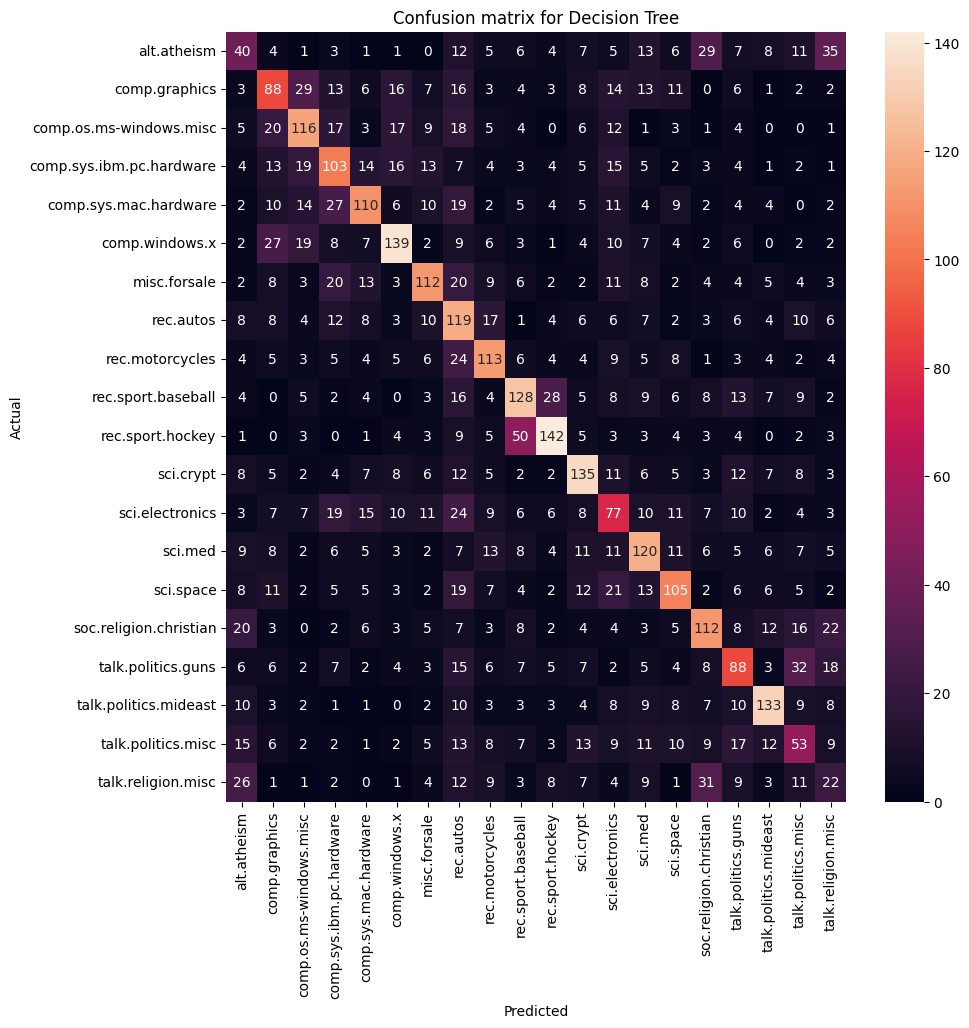

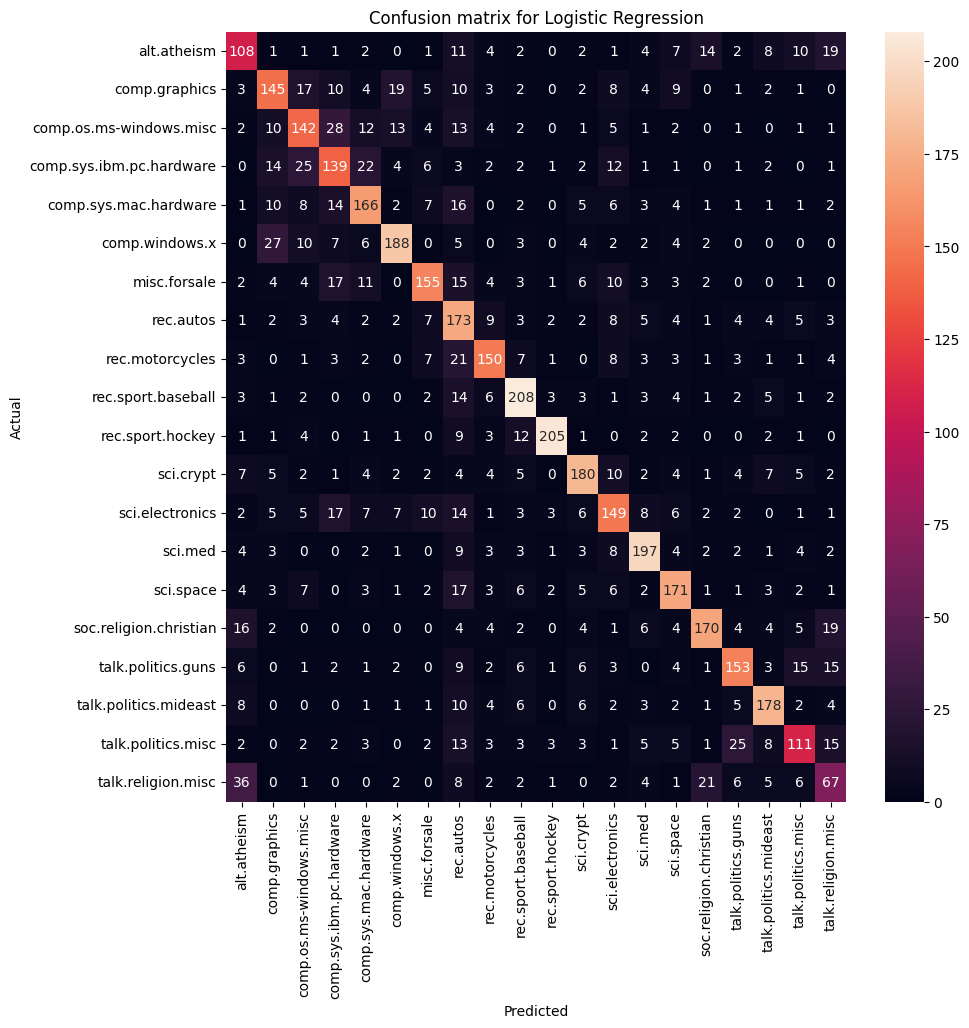

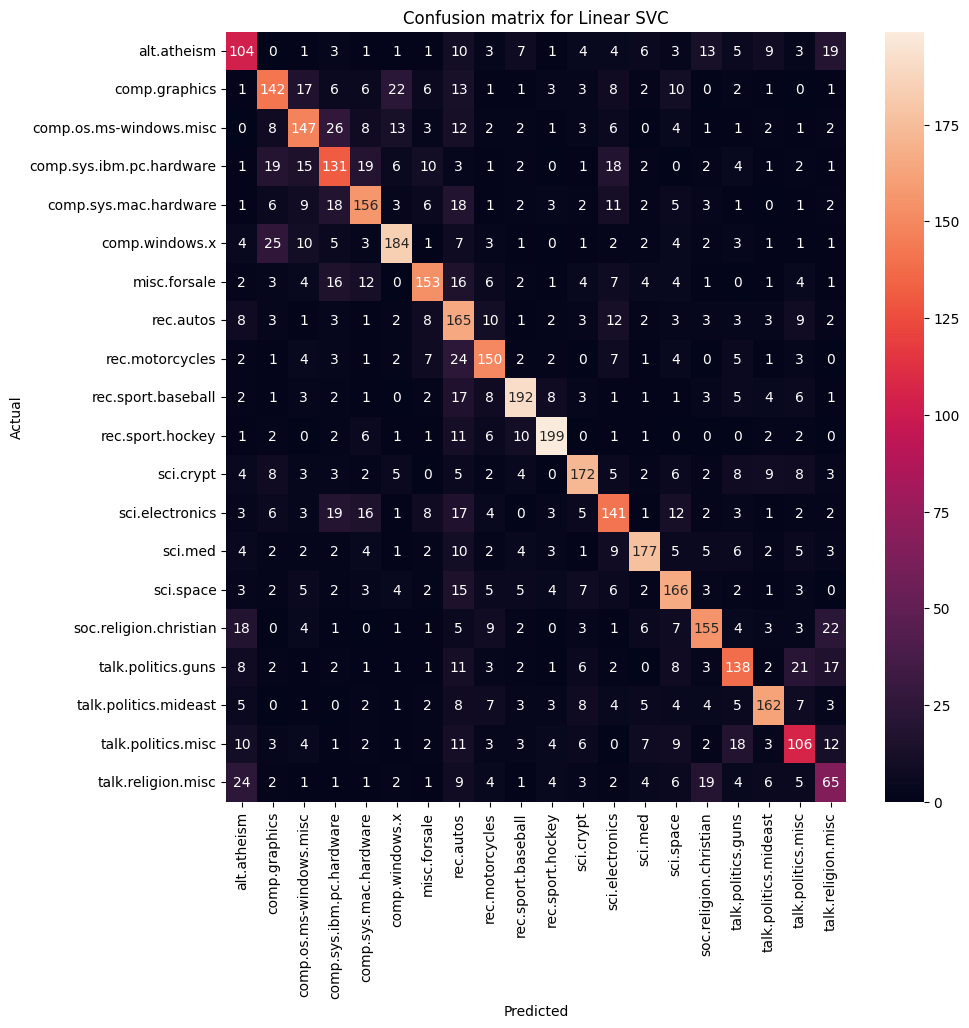

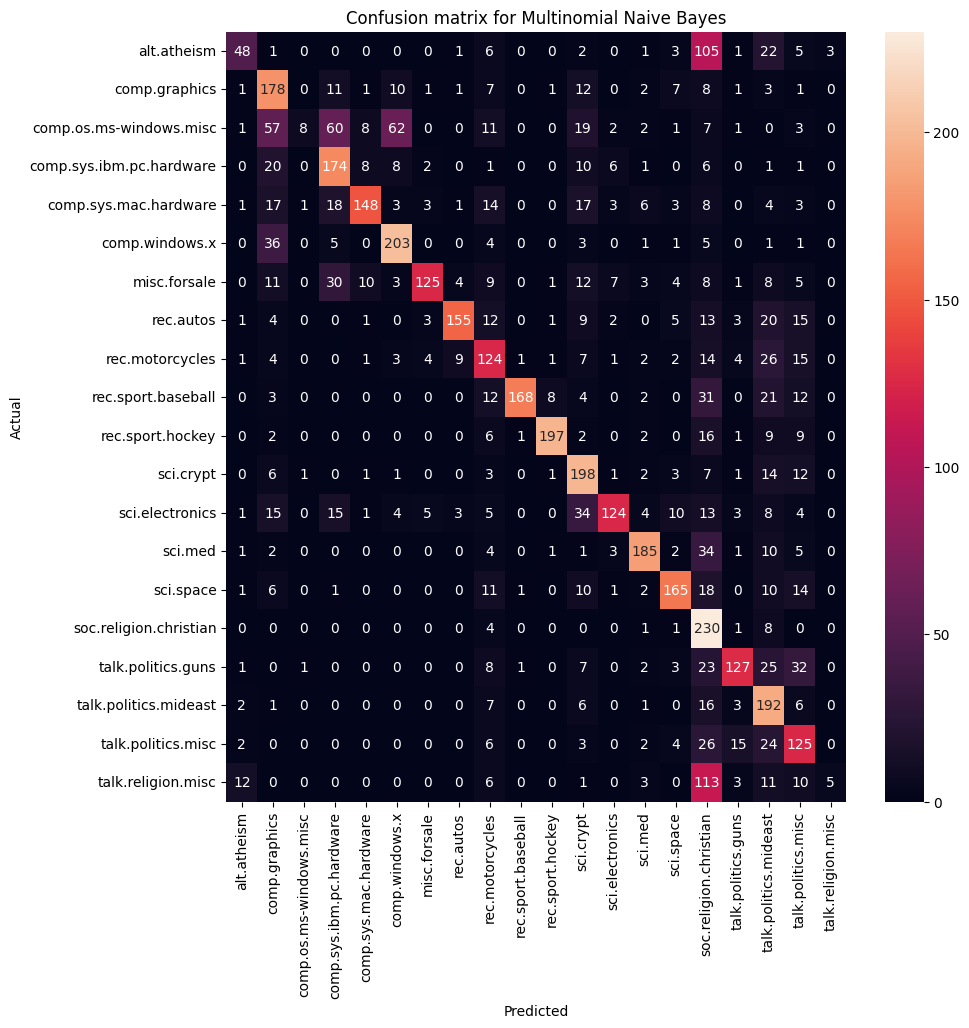

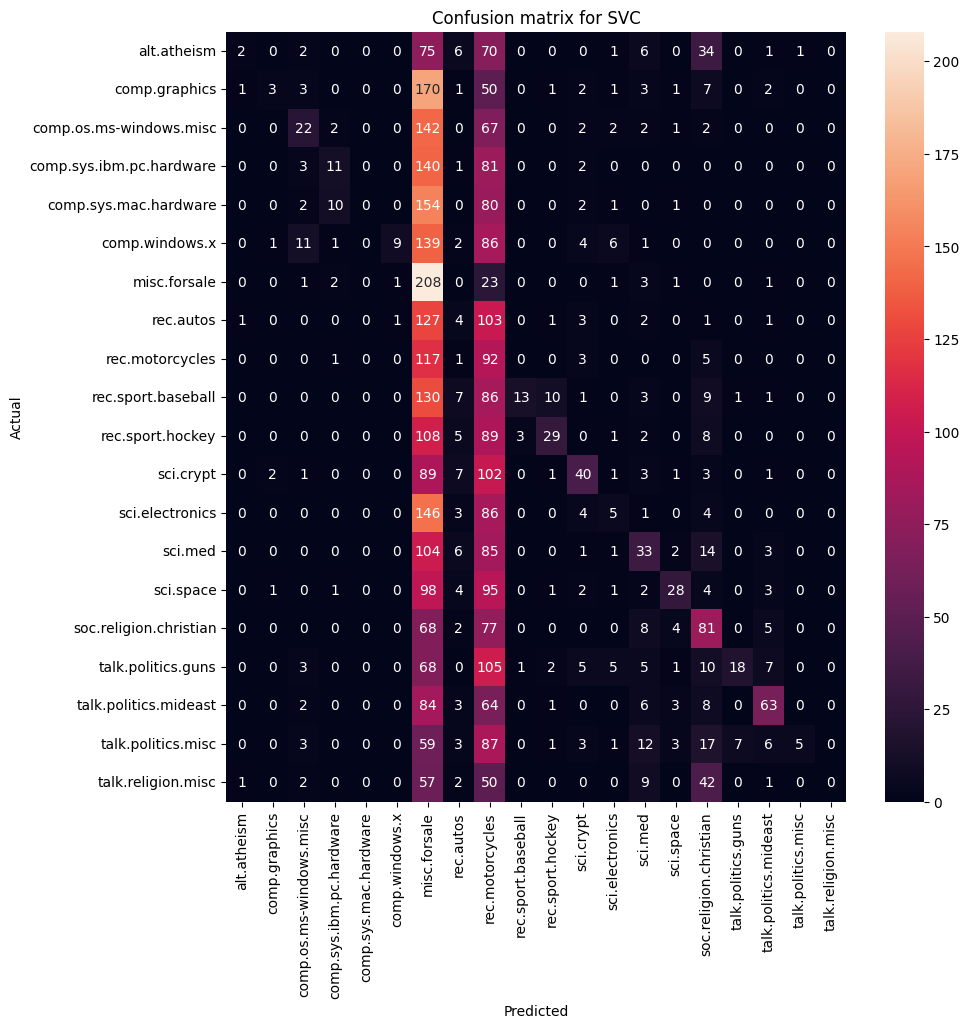

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Plot confusion matrix
for name,clf in classifiers.items():
    y_pred = clf.predict(X_test_tfidf)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,10))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion matrix for {name}')
    plt.show()


- These accuracy scores acts as a good bench mark, looking at the report of these models will tell us a lot more about the data and the spread
- When I was going over the report , some thing striked, the articles can have different words lenghts and articles with big size ( with a lot of words) can have an imapct on the classification we have to normalise it so that a single category doesnt have too much importance. 
- the article size imbalance is something we need to keep in mind when we preprocess the text
